In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


from sklearn.metrics import confusion_matrix
import seaborn as sns


from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard


from sklearn.model_selection import KFold



# **Loading the data**



In [5]:
train_path = '/content/drive/MyDrive/data/train'
test_path = '/content/drive/MyDrive/data/test'


In [6]:
generator = ImageDataGenerator(rescale = 1/255,
                               validation_split= 0.2)

train = generator.flow_from_directory(train_path,
                                      target_size=(150, 150),
                                      batch_size=64,
                                      shuffle=True,
                                      color_mode='rgb',
                                      seed = 123,
                                      class_mode = 'binary',
                                      subset = 'training')

validation = generator.flow_from_directory(train_path,
                                      target_size=(150, 150),
                                      batch_size=64,
                                      shuffle=True,
                                      color_mode='rgb',
                                      seed = 123,
                                      class_mode = 'binary',
                                      subset = 'validation')

test = generator.flow_from_directory(test_path,
                                      target_size=(150, 150),
                                      batch_size=64,
                                      shuffle=True,
                                      color_mode='rgb',
                                      seed = 123,
                                      class_mode = 'binary')

Found 3796 images belonging to 2 classes.
Found 947 images belonging to 2 classes.
Found 1184 images belonging to 2 classes.


# **Visualization of the first batch of the training set**

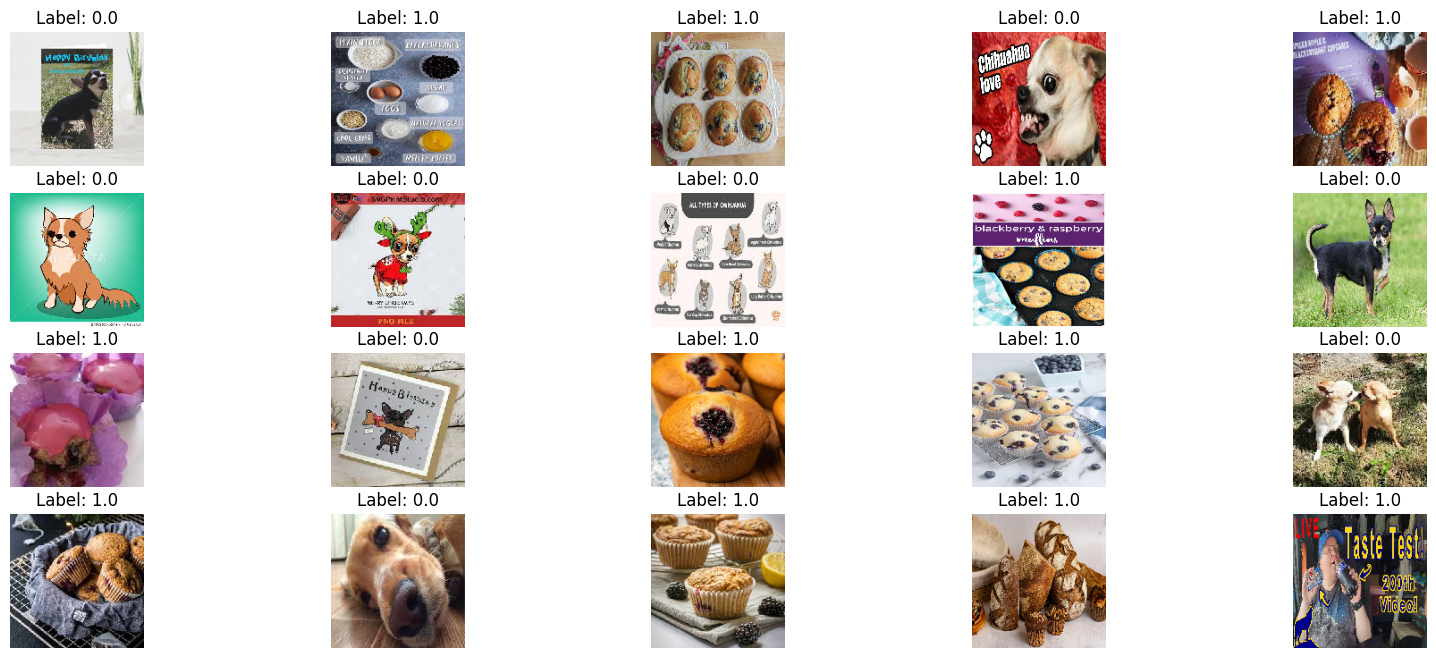

In [5]:
train.reset()

plt.figure(figsize=(20, 8))
for i in range(20):
    batch_data, batch_labels = train.next()

    plt.subplot(4, 5, i+1)
    plt.imshow(batch_data[0])
    plt.title(f"Label: {batch_labels[0]}")
    plt.axis('off')
plt.show()

# **Model 1**

In [7]:
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, (3, 3), input_shape=(150, 150, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())

model1.add(Dense(64))
model1.add(Activation('relu'))

model1.add(Dense(1))
model1.add(Activation('sigmoid'))


model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                   

In [8]:
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history1 = model1.fit_generator(train,
                    steps_per_epoch=int(train.n/train.batch_size),
                    epochs=20,
                    validation_data=validation,
                    validation_steps = int(validation.n/validation.batch_size)
                    )

<ipython-input-8-e9cfb0de2038>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1 = model1.fit_generator(train,


Epoch 1/20
59/59 [==============================] - 772s 13s/step - loss: 0.7891 - accuracy: 0.6624 - val_loss: 0.4521 - val_accuracy: 0.8158
Epoch 2/20
59/59 [==============================] - 170s 3s/step - loss: 0.4290 - accuracy: 0.8079 - val_loss: 0.3736 - val_accuracy: 0.8404
Epoch 3/20
59/59 [==============================] - 179s 3s/step - loss: 0.3509 - accuracy: 0.8542 - val_loss: 0.3983 - val_accuracy: 0.8337
Epoch 4/20
59/59 [==============================] - 170s 3s/step - loss: 0.3166 - accuracy: 0.8679 - val_loss: 0.3540 - val_accuracy: 0.8504
Epoch 5/20
59/59 [==============================] - 174s 3s/step - loss: 0.2407 - accuracy: 0.9051 - val_loss: 0.3067 - val_accuracy: 0.8772
Epoch 6/20
59/59 [==============================] - 172s 3s/step - loss: 0.1944 - accuracy: 0.9303 - val_loss: 0.3012 - val_accuracy: 0.8750
Epoch 7/20
59/59 [==============================] - 172s 3s/step - loss: 0.1543 - accuracy: 0.9437 - val_loss: 0.3028 - val_accuracy: 0.8728
Epoch 8/20
5

# **Plotting the accuracy and loss of model 1**

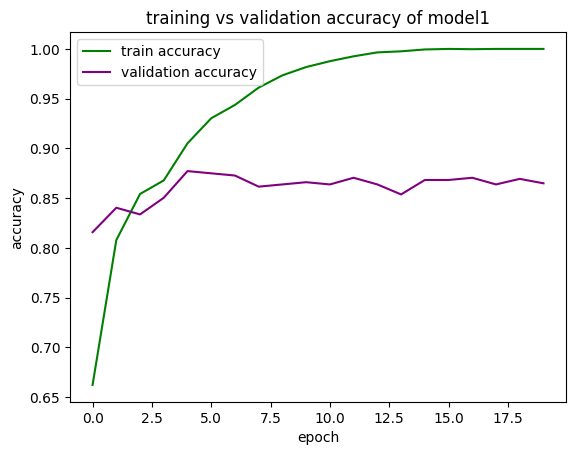

In [9]:
plt.plot(history1.history['accuracy'], color = 'green')
plt.plot(history1.history['val_accuracy'], color = 'purple')
plt.title('training vs validation accuracy of model1')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='upper left')
plt.show()

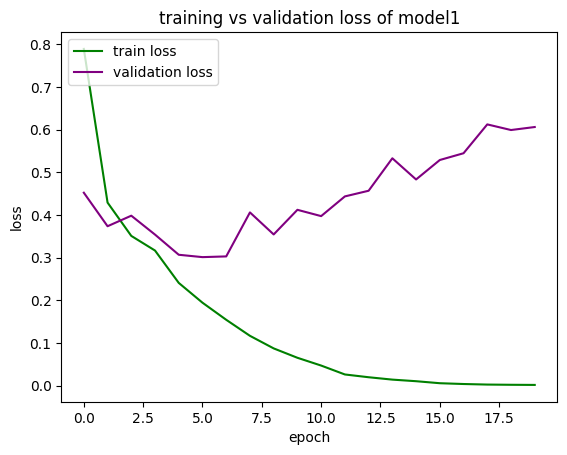

In [10]:
plt.plot(history1.history['loss'], color = 'green')
plt.plot(history1.history['val_loss'], color = 'purple')
plt.title('training vs validation loss of model1')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.show()

# **Confusion matrix of model 1**

2/2 [==============================] - 2s 623ms/step


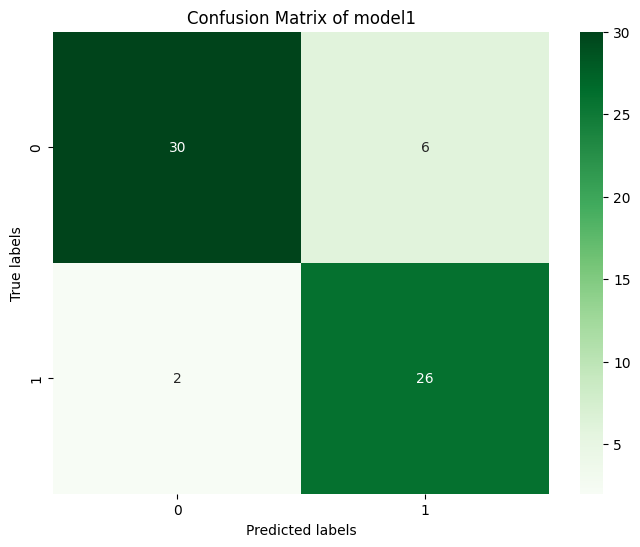

In [11]:
test.reset()
x_test , y_test = test.next()

predictions = model1.predict(x_test)
binary_predictions = (predictions >= 0.5).astype(int)

cm = confusion_matrix(y_test, binary_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of model1')
plt.show()

In [12]:
model1.evaluate(test)

19/19 [==============================] - 477s 26s/step - loss: 0.7562 - accuracy: 0.8598


[0.7561641335487366, 0.8597972989082336]

# **Model 2**

In [13]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3), input_shape=(150, 150, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(128, (3, 3), input_shape=(150, 150, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())

model2.add(Dense(64))
model2.add(Activation('relu'))

model2.add(Dense(1))
model2.add(Activation('sigmoid'))


model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 activation_4 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 activation_5 (Activation)   (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                 

In [14]:
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history2 = model2.fit_generator(train,
                    steps_per_epoch=int(train.n/train.batch_size),
                    epochs=20,
                    validation_data=validation,
                    validation_steps = int(validation.n/validation.batch_size)
                    )

<ipython-input-14-058c9cbd8704>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = model2.fit_generator(train,


Epoch 1/20
59/59 [==============================] - 211s 4s/step - loss: 0.6738 - accuracy: 0.6302 - val_loss: 0.5171 - val_accuracy: 0.7533
Epoch 2/20
59/59 [==============================] - 203s 3s/step - loss: 0.5095 - accuracy: 0.7492 - val_loss: 0.3890 - val_accuracy: 0.8438
Epoch 3/20
59/59 [==============================] - 207s 4s/step - loss: 0.3886 - accuracy: 0.8261 - val_loss: 0.3220 - val_accuracy: 0.8683
Epoch 4/20
59/59 [==============================] - 209s 4s/step - loss: 0.3378 - accuracy: 0.8526 - val_loss: 0.2799 - val_accuracy: 0.8772
Epoch 5/20
59/59 [==============================] - 205s 3s/step - loss: 0.3021 - accuracy: 0.8655 - val_loss: 0.3180 - val_accuracy: 0.8661
Epoch 6/20
59/59 [==============================] - 218s 4s/step - loss: 0.2521 - accuracy: 0.8944 - val_loss: 0.3497 - val_accuracy: 0.8560
Epoch 7/20
59/59 [==============================] - 210s 4s/step - loss: 0.2148 - accuracy: 0.9124 - val_loss: 0.3185 - val_accuracy: 0.8772
Epoch 8/20
59

# **Plotting the accuracy and loss of model 2**

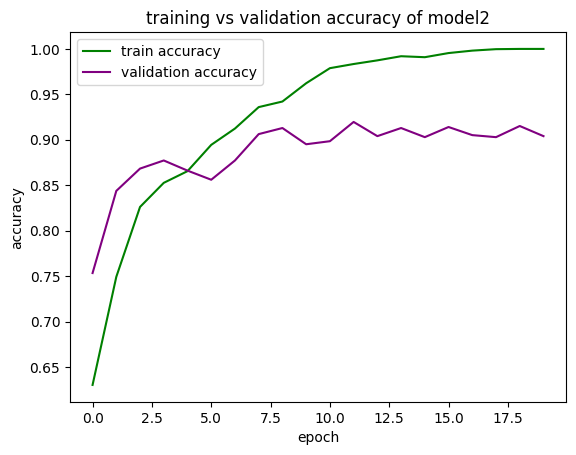

In [15]:
plt.plot(history2.history['accuracy'], color = 'green')
plt.plot(history2.history['val_accuracy'], color = 'purple')
plt.title('training vs validation accuracy of model2')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='upper left')
plt.show()

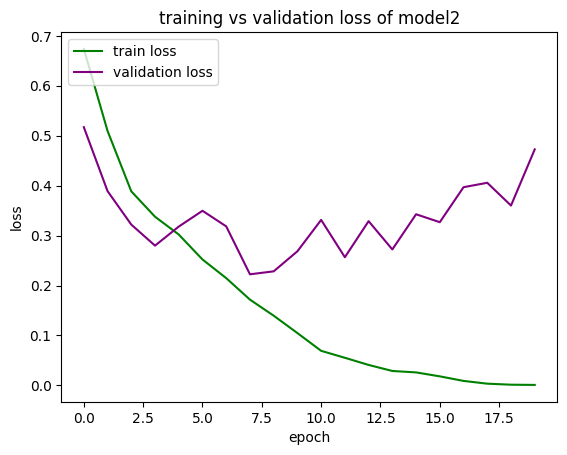

In [16]:
plt.plot(history2.history['loss'], color = 'green')
plt.plot(history2.history['val_loss'], color = 'purple')
plt.title('training vs validation loss of model2')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.show()

In [17]:
test.reset()
x_test , y_test = test.next()

# **Confusion matrix of model 2**

2/2 [==============================] - 1s 347ms/step


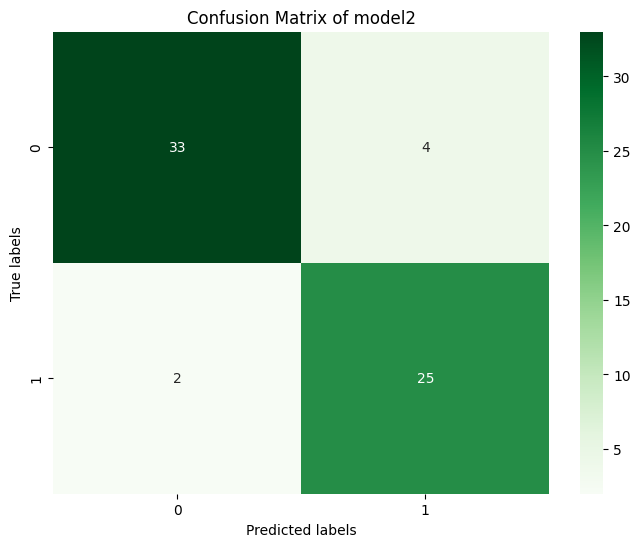

In [18]:
predictions2 = model2.predict(x_test)

binary_predictions2 = (predictions2 >= 0.5).astype(int)

cm2 = confusion_matrix(y_test, binary_predictions2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of model2')
plt.show()

In [19]:
model2.evaluate(test)

19/19 [==============================] - 23s 1s/step - loss: 0.5422 - accuracy: 0.8986


[0.542232096195221, 0.8986486196517944]

# **Model 3**

In [24]:
model3 = Sequential()

model3.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(64, (3, 3), input_shape=(150, 150, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(128, (3, 3), input_shape=(150, 150, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(256, (3, 3), input_shape=(150, 150, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())

model3.add(Dense(64))
model3.add(Activation('relu'))

model3.add(Dense(32))
model3.add(Activation('relu'))

model3.add(Dense(1))
model3.add(Activation('sigmoid'))


model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 activation_9 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 activation_10 (Activation)  (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                 

In [25]:
model3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history3 = model3.fit_generator(train,
                    steps_per_epoch=int(train.n/train.batch_size),
                    epochs=20,
                    validation_data=validation,
                    validation_steps = int(validation.n/validation.batch_size)
                    )

<ipython-input-25-b4d03177f661>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history3 = model3.fit_generator(train,


Epoch 1/20
59/59 [==============================] - 239s 4s/step - loss: 0.5902 - accuracy: 0.6806 - val_loss: 0.4829 - val_accuracy: 0.7935
Epoch 2/20
59/59 [==============================] - 233s 4s/step - loss: 0.4716 - accuracy: 0.7795 - val_loss: 0.3707 - val_accuracy: 0.8225
Epoch 3/20
59/59 [==============================] - 236s 4s/step - loss: 0.3628 - accuracy: 0.8379 - val_loss: 0.2798 - val_accuracy: 0.8783
Epoch 4/20
59/59 [==============================] - 259s 4s/step - loss: 0.3105 - accuracy: 0.8666 - val_loss: 0.2764 - val_accuracy: 0.8806
Epoch 5/20
59/59 [==============================] - 239s 4s/step - loss: 0.3045 - accuracy: 0.8754 - val_loss: 0.2475 - val_accuracy: 0.9040
Epoch 6/20
59/59 [==============================] - 258s 4s/step - loss: 0.2443 - accuracy: 0.9009 - val_loss: 0.3104 - val_accuracy: 0.8560
Epoch 7/20
59/59 [==============================] - 236s 4s/step - loss: 0.2075 - accuracy: 0.9228 - val_loss: 0.2074 - val_accuracy: 0.9241
Epoch 8/20
59

# **Plotting the accuracy and loss of model 3**

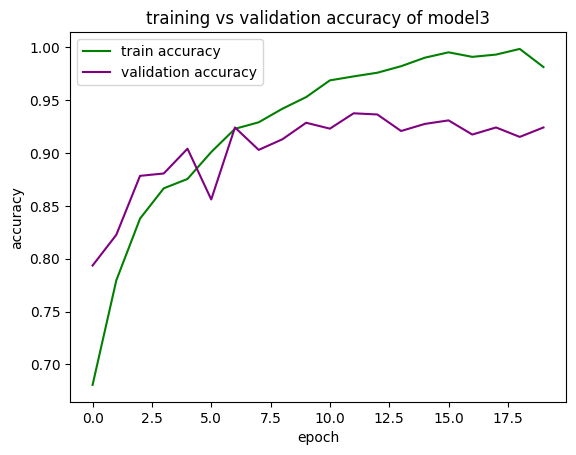

In [26]:
plt.plot(history3.history['accuracy'], color = 'green')
plt.plot(history3.history['val_accuracy'], color = 'purple')
plt.title('training vs validation accuracy of model3')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='upper left')
plt.show()

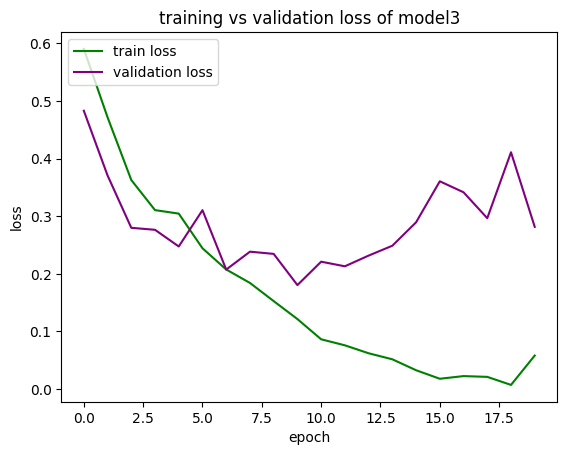

In [27]:
plt.plot(history3.history['loss'], color = 'green')
plt.plot(history3.history['val_loss'], color = 'purple')
plt.title('training vs validation loss of model3')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.show()

# **Confusion matrix of model 3**

2/2 [==============================] - 1s 378ms/step


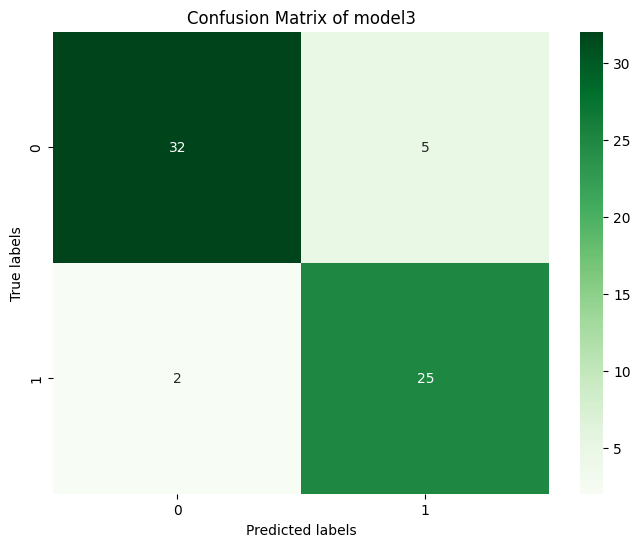

In [28]:
predictions3 = model3.predict(x_test)

binary_predictions3 = (predictions3 >= 0.5).astype(int)

cm3 = confusion_matrix(y_test, binary_predictions3)

plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of model3')
plt.show()

In [29]:
model3.evaluate(test)

19/19 [==============================] - 33s 2s/step - loss: 0.3031 - accuracy: 0.9139


[0.3031134009361267, 0.9138513803482056]

# **Model 4**

# **Image Augmentation**

In [4]:
generator_aug = ImageDataGenerator(rescale = 1/255,
                              zoom_range=0.15,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              horizontal_flip=True,
                              validation_split= 0.2)

train_aug = generator_aug.flow_from_directory(train_path,
                                      target_size=(150, 150),
                                      batch_size=64,
                                      shuffle=True,
                                      color_mode='rgb',
                                      seed = 123,
                                      class_mode = 'binary',
                                      subset = 'training')

validation_aug = generator_aug.flow_from_directory(train_path,
                                      target_size=(150, 150),
                                      batch_size=64,
                                      shuffle=True,
                                      color_mode='rgb',
                                      seed = 123,
                                      class_mode = 'binary',
                                      subset = 'validation')

test_aug = generator_aug.flow_from_directory(test_path,
                                      target_size=(150, 150),
                                      batch_size=64,
                                      shuffle=True,
                                      color_mode='rgb',
                                      seed = 123,
                                      class_mode = 'binary')

Found 3796 images belonging to 2 classes.
Found 947 images belonging to 2 classes.
Found 1184 images belonging to 2 classes.


In [7]:
model4 = Sequential()

model4.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Conv2D(64, (3, 3), input_shape=(150, 150, 3)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Conv2D(128, (3, 3), input_shape=(150, 150, 3)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Conv2D(256, (3, 3), input_shape=(150, 150, 3)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Flatten())

model4.add(Dense(128))
model4.add(Activation('relu'))

model4.add(Dense(64))
model4.add(Activation('relu'))

model4.add(Dense(32))
model4.add(Activation('relu'))

model4.add(Dense(1))
model4.add(Activation('sigmoid'))


model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                   

In [32]:
model4.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history4 = model4.fit_generator(train_aug,
                    steps_per_epoch=int(train_aug.n/train_aug.batch_size),
                    epochs=20,
                    validation_data=validation_aug,
                    validation_steps = int(validation_aug.n/validation_aug.batch_size)
                    )

<ipython-input-32-c8e1999087a8>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history4 = model4.fit_generator(train_aug,


Epoch 1/20
59/59 [==============================] - 280s 5s/step - loss: 0.5853 - accuracy: 0.6908 - val_loss: 0.4682 - val_accuracy: 0.7879
Epoch 2/20
59/59 [==============================] - 262s 4s/step - loss: 0.4800 - accuracy: 0.7768 - val_loss: 0.4368 - val_accuracy: 0.8036
Epoch 3/20
59/59 [==============================] - 277s 5s/step - loss: 0.4174 - accuracy: 0.8140 - val_loss: 0.4012 - val_accuracy: 0.8326
Epoch 4/20
59/59 [==============================] - 277s 5s/step - loss: 0.3992 - accuracy: 0.8229 - val_loss: 0.3207 - val_accuracy: 0.8661
Epoch 5/20
59/59 [==============================] - 277s 5s/step - loss: 0.3266 - accuracy: 0.8564 - val_loss: 0.2881 - val_accuracy: 0.8850
Epoch 6/20
59/59 [==============================] - 260s 4s/step - loss: 0.3529 - accuracy: 0.8529 - val_loss: 0.2713 - val_accuracy: 0.8906
Epoch 7/20
59/59 [==============================] - 260s 4s/step - loss: 0.3006 - accuracy: 0.8749 - val_loss: 0.2317 - val_accuracy: 0.9051
Epoch 8/20
59

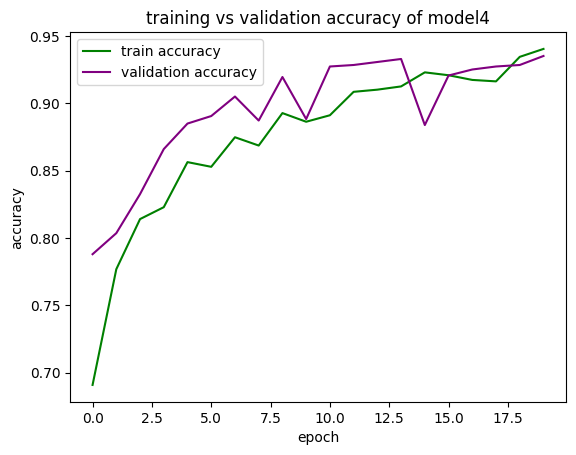

In [33]:
plt.plot(history4.history['accuracy'], color = 'green')
plt.plot(history4.history['val_accuracy'], color = 'purple')
plt.title('training vs validation accuracy of model4')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='upper left')
plt.show()

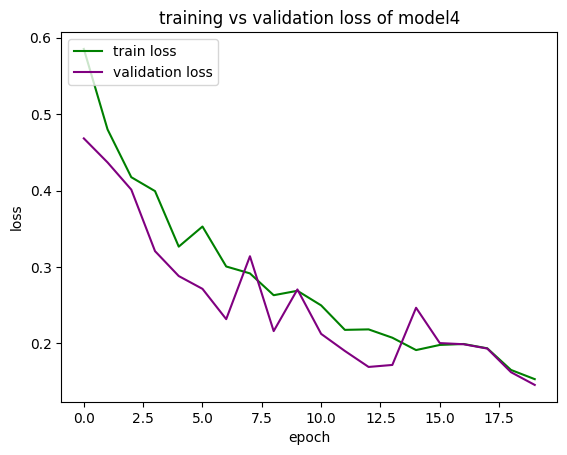

In [34]:
plt.plot(history4.history['loss'], color = 'green')
plt.plot(history4.history['val_loss'], color = 'purple')
plt.title('training vs validation loss of model4')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.show()

In [35]:
test_aug.reset()
x_test , y_test = test_aug.next()

2/2 [==============================] - 2s 695ms/step


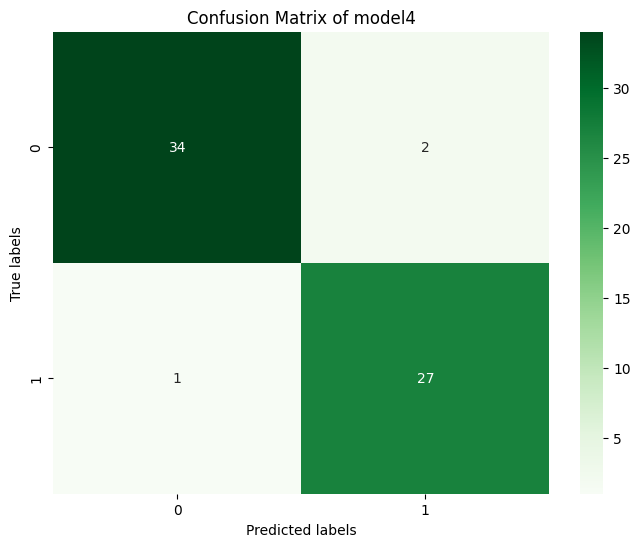

In [36]:
predictions4= model4.predict(x_test)

binary_predictions4 = (predictions4 >= 0.5).astype(int)

cm4 = confusion_matrix(y_test, binary_predictions4)

plt.figure(figsize=(8, 6))
sns.heatmap(cm4, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of model4')
plt.show()

In [37]:
model4.evaluate(test_aug)

19/19 [==============================] - 34s 2s/step - loss: 0.1764 - accuracy: 0.9274


[0.1763884723186493, 0.9273648858070374]

# **Cross validation**

1.Creating dataframes

In [8]:
def extract_filenames_and_labels(directory):
    filenames = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        for filename in os.listdir(label_dir):
            filenames.append(os.path.join(label_dir, filename))
            labels.append(label)
    return filenames, labels

train_filenames, train_labels = extract_filenames_and_labels(train_path)
test_filenames, test_labels = extract_filenames_and_labels(test_path)

train_df = pd.DataFrame({'filename': train_filenames, 'label': train_labels})
test_df = pd.DataFrame({'filename': test_filenames, 'label': test_labels})

print("Training DataFrame:")
print(train_df.head())
print("\nTest DataFrame:")
print(test_df.head())

Training DataFrame:
                                            filename      label
0  /content/drive/MyDrive/data/train/chihuahua/im...  chihuahua
1  /content/drive/MyDrive/data/train/chihuahua/im...  chihuahua
2  /content/drive/MyDrive/data/train/chihuahua/im...  chihuahua
3  /content/drive/MyDrive/data/train/chihuahua/im...  chihuahua
4  /content/drive/MyDrive/data/train/chihuahua/im...  chihuahua

Test DataFrame:
                                            filename   label
0  /content/drive/MyDrive/data/test/muffin/img_0_...  muffin
1  /content/drive/MyDrive/data/test/muffin/img_0_...  muffin
2  /content/drive/MyDrive/data/test/muffin/img_0_...  muffin
3  /content/drive/MyDrive/data/test/muffin/img_0_...  muffin
4  /content/drive/MyDrive/data/test/muffin/img_0_...  muffin


2.Defining the model

In [9]:
kfold =  KFold(n_splits = 5, shuffle = True, random_state = 54)

generator_aug2 = ImageDataGenerator(rescale = 1/255,
                              zoom_range=0.15,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              horizontal_flip=True,
                              validation_split= 0.1)


3.Implementation

In [13]:
train_loss_per_fold = []
train_acc_per_fold = []
val_acc_per_fold = []
val_loss_per_fold = []

validation_acc = []
validation_loss = []



for train_idx, val_idx in kfold.split(train_df):

    df_train = train_df.iloc[train_idx]
    df_validation = train_df.iloc[val_idx]



    train_generator = generator_aug2.flow_from_dataframe(
                                        df_train,
                                        directory = None,
                                        x_col ='filename',
                                        y_col ='label',
                                        target_size = (150,150),
                                        class_mode ='binary',
                                        batch_size = 64,
                                        color_mode = 'rgb',
                                        shuffle = True,
                                        seed = 123,
                                        subset = 'training'
                                        )
    validation_generator = generator_aug2.flow_from_dataframe(
                                        df_train,
                                        directory = None,
                                        x_col ='filename',
                                        y_col ='label',
                                        target_size = (150,150),
                                        class_mode ='binary',
                                        batch_size = 64,
                                        color_mode = 'rgb',
                                        shuffle = True,
                                        seed = 123,
                                        subset = 'validation'
                                        )


    val = generator_aug2.flow_from_dataframe(
                                       df_validation,
                                       directory = None,
                                       x_col = 'filename',
                                       y_col = 'label',
                                       target_size=(150, 150),
                                       batch_size=64,
                                       shuffle=True,
                                       color_mode='rgb',
                                       seed = 123,
                                       class_mode = 'binary'
                                       )

    model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model4.fit(train_generator,
                        epochs=10,
                        validation_data=validation_generator,
                        steps_per_epoch=int(train_generator.n/train_generator.batch_size),
                        validation_steps = int(validation_generator.n/validation_generator.batch_size),
                        callbacks=[TensorBoard(log_dir='./logs',)]
                        )

    evaluation = model4.evaluate(val)

    validation_acc.append(evaluation[1])
    validation_loss.append(evaluation[0])


    train_loss_per_fold.append(history.history['loss'])
    train_acc_per_fold.append(history.history['accuracy'])
    val_acc_per_fold.append(history.history['val_accuracy'])
    val_loss_per_fold.append(history.history['val_loss'])



    tf.keras.backend.clear_session()

Found 3415 validated image filenames belonging to 2 classes.
Found 379 validated image filenames belonging to 2 classes.
Found 949 validated image filenames belonging to 2 classes.
Epoch 1/10
53/53 [==============================] - 1675s 32s/step - loss: 0.6090 - accuracy: 0.6628 - val_loss: 0.6852 - val_accuracy: 0.6375
Epoch 2/10
53/53 [==============================] - 225s 4s/step - loss: 0.4592 - accuracy: 0.8001 - val_loss: 0.5486 - val_accuracy: 0.7094
Epoch 3/10
53/53 [==============================] - 229s 4s/step - loss: 0.3917 - accuracy: 0.8326 - val_loss: 0.2845 - val_accuracy: 0.8687
Epoch 4/10
53/53 [==============================] - 242s 5s/step - loss: 0.3457 - accuracy: 0.8493 - val_loss: 0.3966 - val_accuracy: 0.8469
Epoch 5/10
53/53 [==============================] - 226s 4s/step - loss: 0.3450 - accuracy: 0.8478 - val_loss: 0.4033 - val_accuracy: 0.8219
Epoch 6/10
53/53 [==============================] - 231s 4s/step - loss: 0.2963 - accuracy: 0.8738 - val_loss: 0

In [14]:
print('validation accuracy is: ', np.mean(validation_acc))
print('validation loss is: ', np.mean(validation_loss))

validation accuracy is:  0.9268537282943725
validation loss is:  0.19489291608333587


In [15]:
test_cv = generator_aug2.flow_from_dataframe(
                                       test_df,
                                       directory = None,
                                       x_col = 'filename',
                                       y_col = 'label',
                                       target_size=(150, 150),
                                       batch_size=64,
                                       shuffle=True,
                                       color_mode='rgb',
                                       seed = 123,
                                       class_mode = 'binary'
                                       )


Found 1184 validated image filenames belonging to 2 classes.


In [16]:
model4.evaluate(test_cv)

19/19 [==============================] - 532s 29s/step - loss: 0.1288 - accuracy: 0.9527


[0.12884804606437683, 0.9527027010917664]

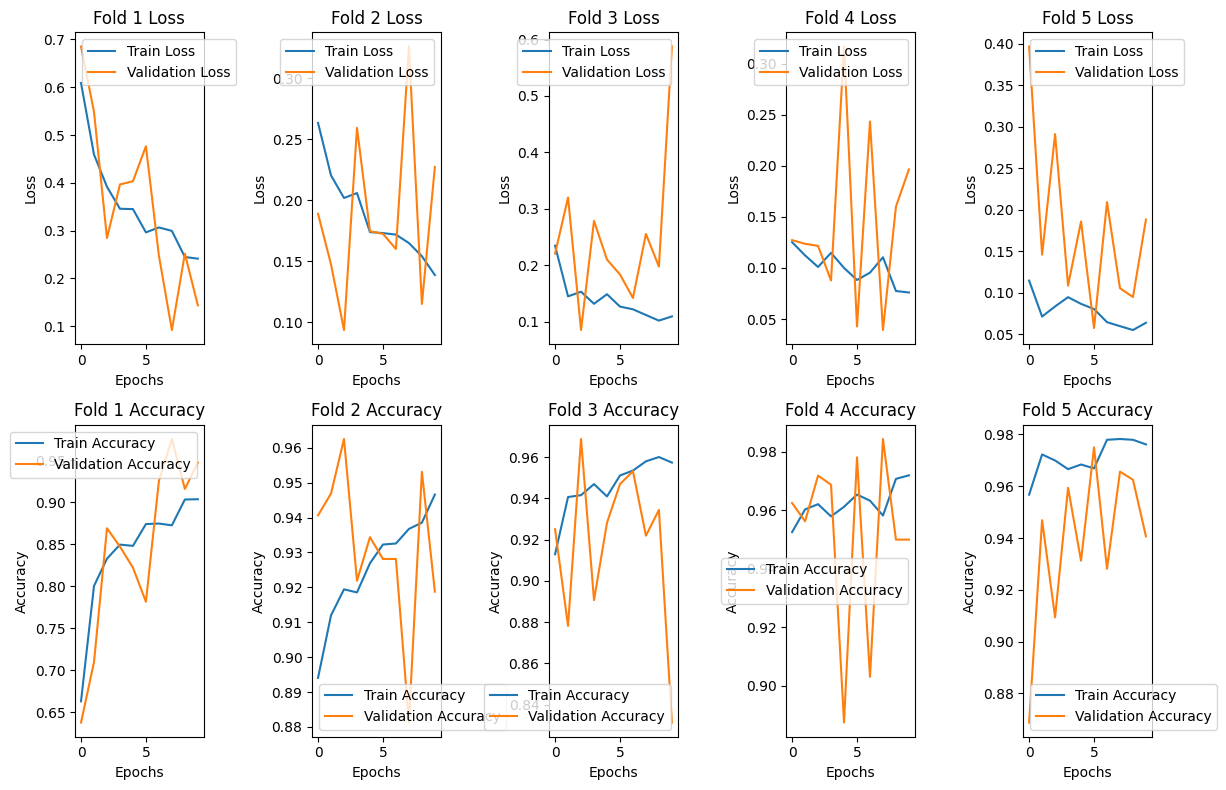

In [17]:
plt.figure(figsize=(12, 8))

for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.plot(train_loss_per_fold[i], label='Train Loss')
    plt.plot(val_loss_per_fold[i], label='Validation Loss')
    plt.title(f'Fold {i+1} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

for i in range(5):
    plt.subplot(2, 5, i + 1 + 5)
    plt.plot(train_acc_per_fold[i], label='Train Accuracy')
    plt.plot(val_acc_per_fold[i], label='Validation Accuracy')
    plt.title(f'Fold {i+1} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()